In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [2]:
a = 1
t = 1
t_perp = 1
N = 1000

In [3]:
def e1(kx, ky, alpha):
  return 1 / 2 * (-2 * t * np.cos(a * kx) - 2 * t * np.cos(2 * np.pi * alpha - a * kx) -
              4 * t * np.cos(a * ky) - np.sqrt(4 * t**2 - 4 * t**2 * np.cos(2 * np.pi * alpha) +
                                               2 * t**2 * np.cos(2 * a * kx) - 4 * t**2 * np.cos(2 * np.pi * alpha - 2 * a * kx) +
                                               2 * t**2 * np.cos(4 * np.pi * alpha - 2 * a * kx) + 4 * t_perp**2))

def e2(kx, ky, alpha):
  return 1 / 2 * (-2 * t * np.cos(a * kx) - 2 * t * np.cos(2 * np.pi * alpha - a * kx) -
              4 * t * np.cos(a * ky) + np.sqrt(4 * t**2 - 4 * t**2 * np.cos(2 * np.pi * alpha) +
                                               2 * t**2 * np.cos(2 * a * kx) - 4 * t**2 * np.cos(2 * np.pi * alpha - 2 * a * kx) +
                                               2 * t**2 * np.cos(4 * np.pi * alpha - 2 * a * kx) + 4 * t_perp**2))

def fermi_level(all_states):
  energy_sorted = np.sort(all_states)
  E_fermi = energy_sorted[len(energy_sorted) // 2 - 1]  # Assuming half-filling

  return E_fermi

def fermi_dirac(E, T, mu):
  beta = 1.0 / T
  return 1.0 / (np.exp((E - mu) * beta) + 1)

def bandwidth(band):
  return (float)(band.max() - band.min())

def kinetic_energy(e1, e2, T=0.01):
  all_states = np.concatenate([e1, e2])
  E_fermi = fermi_level(all_states)

  occupations = fermi_dirac(all_states, T, E_fermi)

  return (float)(np.sum(occupations * all_states) / np.sum(occupations))

def dos(e1, e2, n_bins=300):
  all_states = np.concatenate([e1, e2])
  e_min, e_max = all_states.min(), all_states.max()
  bins = np.linspace(e_min, e_max, n_bins)

  hist, bin_edges = np.histogram(all_states, bins=bins, density=True)
  bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

  return bin_centers, gaussian_filter1d(hist, sigma=2.0)

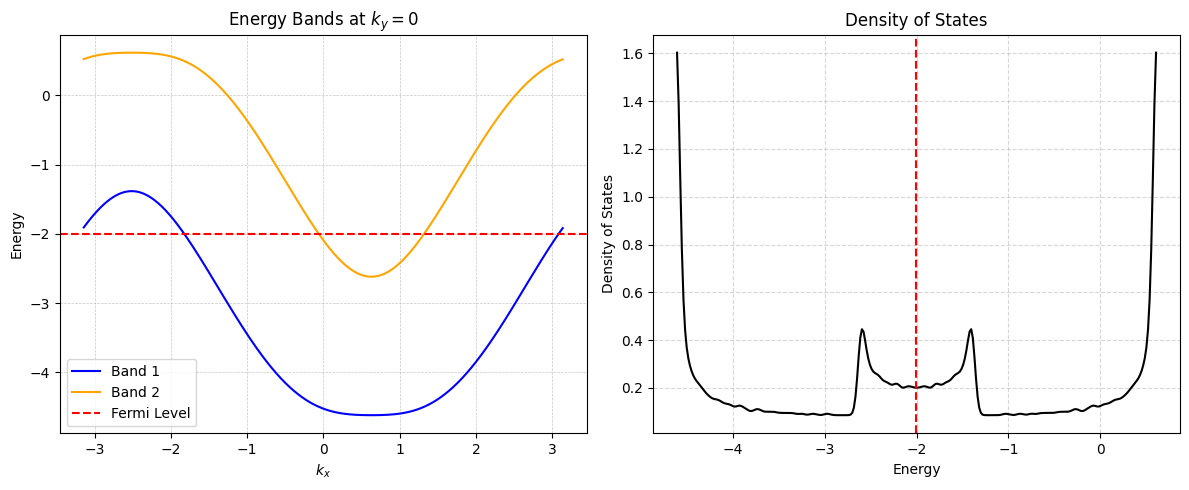

In [4]:
alpha = 0.2

kx = np.arange(-np.pi, np.pi, 2 * np.pi / (N * a))
ky = np.array([0])

band1 = e1(kx, ky, alpha)
band2 = e2(kx, ky, alpha)
bin_centers, DOS = dos(band1, band2)
e_fermi = fermi_level(np.concatenate([band1, band2]))

# graphical representation

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(kx, band1, label='Band 1', color='blue')
axes[0].plot(kx, band2, label='Band 2', color='orange')

axes[0].axhline(y=e_fermi, color='red', linestyle='--', linewidth=1.5, label='Fermi Level')
axes[0].set_xlabel(r'$k_x$')
axes[0].set_ylabel('Energy')
axes[0].set_title('Energy Bands at $k_y = 0$')
axes[0].legend()
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# DOS
axes[1].plot(bin_centers, DOS, color='black')
axes[1].axvline(x=e_fermi, color='red', linestyle='--', linewidth=1.5, label='Fermi Level')
axes[1].set_xlabel('Energy')
axes[1].set_ylabel('Density of States')
axes[1].set_title('Density of States')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

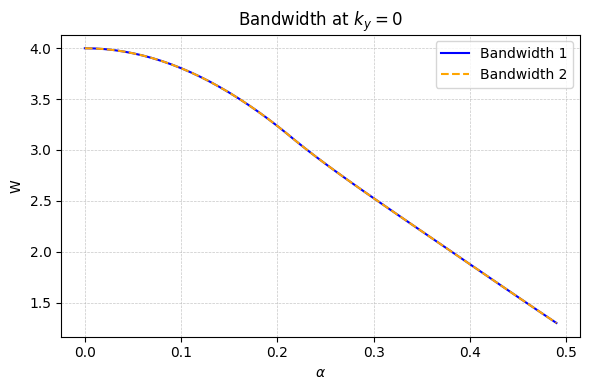

In [5]:
alpha_list = np.arange(0, 0.5, 0.01)

bw1 = bw2 = np.array([])
for alpha in alpha_list:
  bw1 = np.append(bw1, bandwidth(e1(kx, ky, alpha)))
  bw2 = np.append(bw2, bandwidth(e2(kx, ky, alpha)))



# graphical representation

plt.figure(figsize=(6, 4))
plt.plot(alpha_list, bw1, label='Bandwidth 1', color='blue', linestyle = '-')
plt.plot(alpha_list, bw2, label='Bandwidth 2', color='orange', linestyle = '--')

plt.xlabel(r'$\alpha$')
plt.ylabel('W')
plt.title('Bandwidth at $k_y = 0$')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

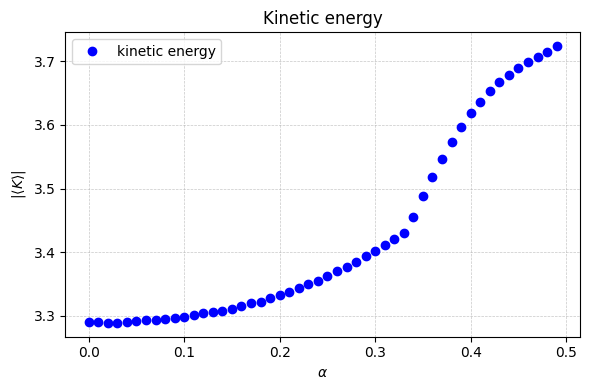

In [6]:
T = 0.5
alpha_list = np.arange(0, 0.5, 0.01)

kin_e = np.array([])
for alpha in alpha_list:
  kin_e = np.append(kin_e, kinetic_energy(e1(kx, ky, alpha), e2(kx, ky, alpha), T))



# graphical representation

plt.figure(figsize=(6, 4))
plt.plot(alpha_list, abs(kin_e), 'bo', label=r'kinetic energy')

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$|\langle K\rangle|$')
plt.title('Kinetic energy')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()